# Mini Project: Deep Learning with Keras

In this mini-project we'll be building a deep learning classifier using Keras to predict income from the popular [Adult Income dataset](http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html).

Predicting income from demographic and socio-economic information is an important task with real-world applications, such as financial planning, market research, and social policy analysis. The Adult dataset, sometimes referred to as the "Census Income" dataset, contains a vast amount of anonymized data on individuals, including features such as age, education, marital status, occupation, and more. Our objective is to leverage this data to train a deep learning model that can effectively predict whether an individual's income exceeds $50,000 annually or not.

Throughout this Colab, we will walk you through the entire process of building a deep learning classifier using Keras, a high-level neural network API that runs on top of TensorFlow. Keras is known for its user-friendly and intuitive interface, making it an excellent choice for both beginners and experienced deep learning practitioners.

Here's a brief outline of what we will cover in this mini-project:

1. **Data Preprocessing:** We will start by loading and exploring the Adult dataset.

2. **Building the Deep Learning Model:** We will construct a neural network using Keras, where we'll dive into understanding the key components of a neural network, including layers, activation functions, and optimization algorithms.

3. **Model Training:** With our model architecture in place, we will split the data into training and validation sets and train the neural network on the training data. We will monitor the training process to prevent overfitting and enhance generalization.

4. **Model Evaluation:** After training, we'll assess the performance of our model on the test dataset.

By the end of this tutorial, you will not only have a functional deep learning classifier for income prediction but also gain valuable insights into how to leverage the power of neural networks for solving real-world classification tasks.


In [1]:
!pip install scikeras tensorflow

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from keras.models import Sequential
from keras.layers import Dense, Input # Import Input layer
from scikeras.wrappers import KerasClassifier
from sklearn.pipeline import Pipeline

You can download the Adult data from the link [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data).

Here are your tasks:

  1. Load the Adult data into a Pandas Dataframe.
  2. Ensure the dataset has properly named columns. If the columns are not read in, assign them by referencing the dataset documentation.
  3. Display the first five rows of the dataset.

In [3]:
DATA_PATH = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

# Download the dataset and load it into a pandas DataFrame
columns_names = [ "age", "workclass", "fnlwgt", "education", "education-num",
 "marital-status", "occupation", "relationship", "race", "sex", "capital-gain",
 "capital-loss", "hours-per-week", "native-country", "income"]

df = pd.read_csv(DATA_PATH, names=columns_names, header=None, na_values='?', skipinitialspace=True)

In [4]:
# Display the first few rows of the DataFrame
display(df.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


If you're not already familiar with the Adult dataset, it's important to do some exploratory data analysis.

Here are your tasks:

  1. Do exploratory data analysis to give you some better intuition for the dataset. This is a bit open-ended. How many rows/columns are there? How are NULL values represented? What's the percentage of positive cases in the dataset?

  2. Drop all rows with NULL values.

  3. Use Scikit-Learn's [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to convert the `income` column with a data type string to a binary variable.

In [5]:
# Do some exploratory analysis. How many rows/columns are there? How are NULL
# values represented? What's the percentrage of positive cases in the dataset?

print("Dataset Shape: ")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")
print("\n" + "="*50 + "\n")

# Check for NULL values

print("NULL Values per Column: ")
print(df.isnull().sum())
print(f"\nTotal NULL values: {df.isnull().sum().sum()}")
print(f"Percentage of rows with NULL values: {(df.isnull().any(axis=1).sum() / len(df)) * 100:.2f}%")
print("\n" + "-"*50 + "\n")

# Check data types

print("Data Types:")
print(df.dtypes)
print("\n" + "-"*50 + "\n")

# Analyze the target variable (income)

print("Income Distribution:")
print(df['income'].value_counts())
print("\nIncome Percentage:")

print(df["income"].value_counts(normalize=True)*100)

# Calculate percentage of positive cases (income >50K)

positive_cases= (df['income'] == '>50K').sum()

total_cases = len(df)

positive_percentage = (positive_cases / total_cases) * 100

#rint (fInPercentage of positive cases (>50K): {positive_percentage: 2f)%") print (f"Percentage of negative cases (<=50K): {100 - positive_percentage: 2f}% ")

Dataset Shape: 
Rows: 32561
Columns: 15


NULL Values per Column: 
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

Total NULL values: 4262
Percentage of rows with NULL values: 7.37%

--------------------------------------------------

Data Types:
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

--------------------------------------------------



In [6]:
# Find all NULL values and drop them
print(f"Number of rows before dropping NULL values: ", len(df))
df =df.dropna()
print("Number of rows after dropping NULL values: ", len(df))

Number of rows before dropping NULL values:  32561
Number of rows after dropping NULL values:  30162


In [7]:
# Use Scikit-Learn's LabelEncoder to convert the income column with a data type
# string to a binary variable.

label_encoder = LabelEncoder()
df['income'] = label_encoder.fit_transform(df['income'])

#Display the encoding mapping
print ("Income Encoding Mapping: ")
print(f"classes: {label_encoder.classes_}")
print(f"<=50 K Encoding: {label_encoder.transform(['<=50K'])[0]}")
print(f">50 K Encoding: {label_encoder.transform(['>50K'])[0]}")
print(df[['age', 'education', 'income']].head)

Income Encoding Mapping: 
classes: ['<=50K' '>50K']
<=50 K Encoding: 0
>50 K Encoding: 1
<bound method NDFrame.head of        age   education  income
0       39   Bachelors       0
1       50   Bachelors       0
2       38     HS-grad       0
3       53        11th       0
4       28   Bachelors       0
...    ...         ...     ...
32556   27  Assoc-acdm       0
32557   40     HS-grad       1
32558   58     HS-grad       0
32559   22     HS-grad       0
32560   52     HS-grad       1

[30162 rows x 3 columns]>


1. Split the data into training and test sets. Remember not to include the label you're trying to predict, `income`, as a column in your training data.

In [8]:
# Split dataset into training and test sets
X= df.drop('income', axis=1)
y= df['income']

#Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)




In machine learning, the Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) metric are commonly used to evaluate the performance of binary classification models. These are valuable tools for understanding how well a model can distinguish between the positive and negative classes in a classification problem.

Let's break down each concept:

1. ROC Curve:
The ROC curve is a graphical representation of a binary classifier's performance as the discrimination threshold is varied. It is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at different threshold values. Here's how these rates are calculated:

- True Positive Rate (TPR), also called Sensitivity or Recall, measures the proportion of actual positive instances that are correctly identified by the model:
   TPR = True Positives / (True Positives + False Negatives)

- False Positive Rate (FPR) measures the proportion of actual negative instances that are incorrectly classified as positive by the model:
   FPR = False Positives / (False Positives + True Negatives)

The ROC curve is useful because it shows how well a classifier can trade off between sensitivity and specificity across different threshold values. The ideal ROC curve hugs the top-left corner, indicating a high TPR and low FPR, meaning the classifier is excellent at distinguishing between the two classes.

2. AUC (Area Under the Curve):
The AUC is a scalar metric derived from the ROC curve. It represents the area under the ROC curve, hence its name. The AUC ranges from 0 to 1, where 0 indicates a very poor classifier (always predicting the opposite class) and 1 signifies a perfect classifier (making all correct predictions).

The AUC metric is beneficial because it provides a single value to summarize the classifier's overall performance across all possible threshold values. It is particularly useful when dealing with imbalanced datasets, where one class significantly outnumbers the other. In such cases, accuracy alone might not be a reliable evaluation metric, and AUC can provide a more robust performance measure.

A quick rule of thumb for interpreting AUC values:
- AUC ≈ 0.5: The model performs no better than random guessing.
- 0.5 < AUC < 0.7: The model has poor to fair performance.
- 0.7 < AUC < 0.9: The model has good to excellent performance.
- AUC ≈ 1: The model is close to or has a perfect performance.

Here are your tasks:

  1. Use Scikit-Learn's [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) to calculate the AUC score for a method that always predicts the majority class.  

In [9]:
# Use Scikit-Learn's roc_auc_score to calculate the AUC score for a method that
# always predicts the majority class.
majority_class = y_train.mode()[0]
print(f"Majority Class: {majority_class}")
print(f"Majority Class Distribution: {y_train.value_counts(normalize=True) * 100}")

#Create base line predictions
base_predictions = np.full(len(y_test), majority_class)

# For a constant predictions, AUC will be assumbed as 0.5
baseline_pred_proba = np.full(len(y_test), 0.5)

try:
  baseline_auc = roc_auc_score(y_test, baseline_pred_proba)
  print(f"Baseline AUC: {baseline_auc:.4f}")
except ValueError:
  print("Cannot calculate AUC for constant predictions")




Majority Class: 0
Majority Class Distribution: income
0    75.10879
1    24.89121
Name: proportion, dtype: float64
Baseline AUC: 0.5000


Now, let's do a little feature engineering.

1. Use Scikit-Learn's [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) to apply One Hot Encoding to the categorical variables in `workclass`, `education`, `marital-status`, `occupation`, `relationship`, 'race', `sex`, and `native-country`. Also, apply [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) to the remaining continuous features. How many columns will the dataframe have after these columns transformations are applied?

In [10]:
# Use Scikit-Learn's ColumnTransformer to apply One Hot Encoding to the
# categorical variables in workclass, education, marital-status, occupation,
# relationship, 'race', sex, and native-country. #Also, apply MinMaxScaler to
# the remaining continuous features.

categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features),
        ('num', MinMaxScaler(), numerical_features)
    ],
    remainder= 'passthrough')

#Fit and transform the data using the ColumnTransformer
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

print("Transformed Training Data Shape:", X_train_transformed.shape)
print("Transformed Test Data Shape:", X_test_transformed.shape)




# Apply the ColumnTransformer to the training data

Transformed Training Data Shape: (24129, 96)
Transformed Test Data Shape: (6033, 96)


In [11]:
# How many columns will the dataframe have after these columns transformations are applied?

#Calculate the number of columns transformed
num_numerical = len(numerical_features)
print(f"Number of numerical features: {num_numerical}")
# For catergorical features, we need to count unique values in each column
num_categorical_cols=0
for cat_col in categorical_features:
  unique_values = X_train[cat_col].nunique()
  # OneHotEncoder with drop='first' crates n-1 columns for n categories
  cols_created = unique_values - 1
  num_categorical_cols += cols_created
  print( f"{cat_col}: {unique_values} unique values {cols_created} columns")

  total_columns = num_numerical + num_categorical_cols
print(f"Total number of columns: {total_columns}")
print (f"Numerical columns: {num_numerical}")
print (f"Categorical columns: {num_categorical_cols}")

#Verify with actual transformed data
print(f"Transformed Training Data Shape: {X_train_transformed.shape}")
print(f" Matched Calculations: {X_test_transformed.shape[1] == total_columns}")

Number of numerical features: 6
workclass: 7 unique values 6 columns
education: 16 unique values 15 columns
marital-status: 7 unique values 6 columns
occupation: 14 unique values 13 columns
relationship: 6 unique values 5 columns
race: 5 unique values 4 columns
sex: 2 unique values 1 columns
native-country: 41 unique values 40 columns
Total number of columns: 96
Numerical columns: 6
Categorical columns: 90
Transformed Training Data Shape: (24129, 96)
 Matched Calculations: True


Keras is an open-source deep learning library written in Python. It was developed to provide a user-friendly, high-level interface for building and training neural networks. The library was created by François Chollet and was first released in March 2015 as part of the Deeplearning4j project. Later, it became part of the TensorFlow ecosystem and is now the official high-level API for TensorFlow.

Keras is designed to be modular, user-friendly, and easy to extend. It allows researchers and developers to quickly prototype and experiment with various deep learning models. One of the primary goals of Keras is to enable fast experimentation, making it simple to build and iterate on different architectures.

Key features of Keras include:

1. User-friendly API: Keras provides a simple and intuitive interface for defining and training deep learning models. Its design philosophy focuses on ease of use and clarity of code.

2. Modularity: Models in Keras are built as a sequence of layers, and users can easily stack, merge, or create complex architectures using a wide range of predefined layers.

3. Extensibility: Keras allows users to define custom layers, loss functions, and metrics. This flexibility enables researchers to experiment with new ideas and algorithms seamlessly.

4. Backends: Initially, Keras supported multiple backends, including TensorFlow, Theano, and CNTK. However, as of TensorFlow version 2.0, TensorFlow has become the primary backend for Keras.

5. Multi-GPU and distributed training: Keras supports training models on multiple GPUs and in distributed computing environments, making it suitable for large-scale experiments.

6. Pre-trained models: Keras includes a collection of pre-trained models for common tasks, such as image classification (e.g., VGG, ResNet, MobileNet) and natural language processing (e.g., Word2Vec, GloVe).

The integration of Keras into TensorFlow as its official high-level API has solidified its position as one of the most popular deep learning libraries in the machine learning community. Its ease of use and versatility have contributed to its widespread adoption in both academia and industry for a wide range of deep learning tasks.

Here are your tasks:

1. Create your own model in Keras to predict income in the Adult training data. Remember, it's always better to start simple and add complexity to the model if necessary. What's a good loss function to use?

2. Keras can be integrated with Scitkit-Learn using a wrapper. Use the [KerasClassifier wrapper](https://adriangb.com/scikeras/stable/generated/scikeras.wrappers.KerasClassifier.html) to integrate your Keras model with the ColumnTransformer from previous steps using a [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) object.

3. Fit your model.

4. Calculate the AUC score of your model on the test data. Does the model predict better than random?

5. Generate an ROC curve for your model using [RocCurveDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html). What would the curve look like if all your predictions were randomly generated? What would the curve look like if it you had a perfect model?

In [12]:
# Define the Keras model
def build_model(input_dim):
    model = Sequential()
    model.add(Input(shape=(input_dim,))) # Use Input layer as recommended
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])
    return model

In [13]:
# Create a Keras classifier
keras_clf = KerasClassifier(
    model=build_model,
    model__input_dim= total_columns,
    epochs=10,
    batch_size=32,
    verbose=1
)

In [14]:
# Create the scikit-learn pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', keras_clf)
])

In [15]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Epoch 1/10
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.7779 - loss: 0.4481
Epoch 2/10
755/755 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.8888 - loss: 0.3512
Epoch 3/10
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.9018 - loss: 0.3314
Epoch 4/10
755/755 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.9056 - loss: 0.3247
Epoch 5/10
755/755 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9088 - loss: 0.3172
Epoch 6/10
755/755 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9110 - loss: 0.3159
Epoch 7/10
755/755 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.9127 - loss: 0.3153
Epoch 8/10
755/755 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9121 - loss: 0.3140
Epoch 9/10
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.9138 - loss: 0.3106
Epoch 10/10
755/755 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.9130 - loss: 0.3138


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different tra

In [16]:
# Calculate the AUC score of your model on the test data.
# Does the model predict better than random?
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.4f}")
print(f"Performance: {'Better than random!' if auc_score>0.5 else 'Not better than random'}")

189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
AUC Score: 0.9048
Performance: Better than random!


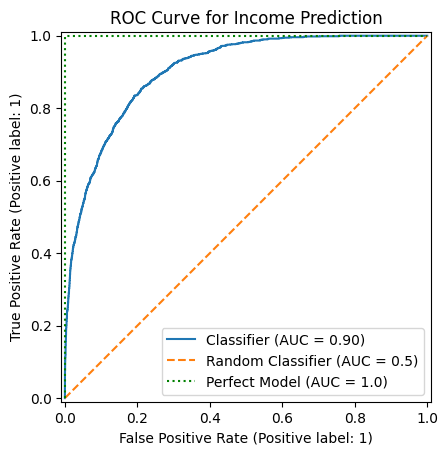

In [17]:
# Generate an ROC curve for your model.
import matplotlib.pyplot as plt

# Create the ROC curve display
roc_display = RocCurveDisplay.from_predictions(y_test, y_pred_proba)


# Plot baseline (random guess)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier (AUC = 0.5)')

# Plot perfect model
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Model (AUC = 1.0)')
å
plt.title('ROC Curve for Income Prediction')å
plt.legend()
plt.show()